In [12]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [7]:
image_path = "../output_videos/cropped_img.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

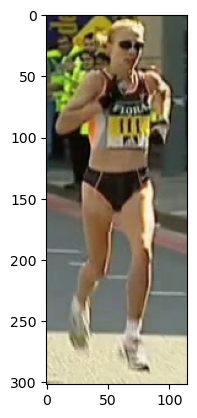

In [8]:
plt.imshow(image)

# take the top half of image 

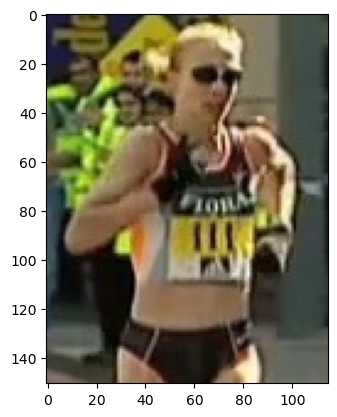

In [11]:
top_half_image = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half_image)
plt.show()

# Cluster the image into two clusters 

c:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\joseph\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


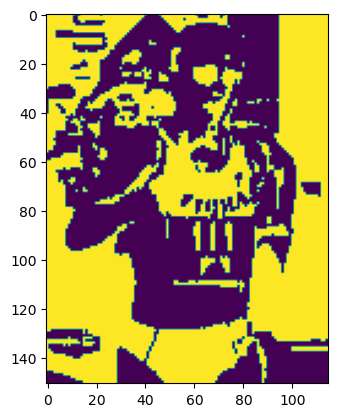

In [21]:
# Reshape the image into 2d array 
image_2d = top_half_image.reshape(-1, 3)

# perform K - Means clustering with 2 clusters 
kmeans = KMeans(n_clusters=2, random_state=0).fit(image_2d)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the original image shape 
clustered_image = labels.reshape(top_half_image.shape[0], top_half_image.shape[1])

# Display the clustered image 
plt.imshow(clustered_image)

In [32]:
corner_clusters = [clustered_image[0, 0], clustered_image[0, -1], clustered_image[-1, 0], clustered_image[-1, -1]]
non_runner_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_runner_cluster)

0


In [33]:
runner_cluster = 1-non_runner_cluster
print(runner_cluster)

1


In [38]:
cluster_centers = kmeans.cluster_centers_
cluster_centers[runner_cluster]

array([55.68875952, 53.19458128, 40.62975817])